# Curso Optativo: Enrutamiento de Vehículos. Trabajo Final

- Carmen Irene Cabrera Rodríguez
- David Guaty Domínguez
- Enrique Martínez González
- Richard García de la Osa

C-512

# Ejemplos de solución mediante Or-Tools de variantes de VRP de la tesis:
## "Validación Automática de Modelos para Problemas de Enrutamiento de Vehículos", de Gabriela Argüelles Terrón


El problema de enrutamiento de vehículos (VRP por sus siglas en inglés) es un problema concerniente a la distribución de mercancías entre un conjunto de almacenes y clientes. El objetivo del VRP es diseñar rutas de costo mínimo desde un almacén a un conjunto de clientes geográficamente dispersos sujeto a un conjunto de restricciones [1].

### Modelación general

Los VRP se modelan como un grafo completo $G = ( V, A )$ donde $V = \{ 0, 1, ..., n \}$ es el conjunto de vértices y $A = \{( i, j ) | i, j ∈ V \}$ el conjunto de aristas que conectan vértices. Los vértices $\{ 1, 2, ..., n \}$ representan a los clientes y $0$ representa al almacén. A cada arista $( i, j )$ $\in$ $A$ se le asocia un costo $c_{ij}$ representado en una matriz. Como no se permiten aristas $( i, i )$ el costo asociado a las mismas es $c_{ii} = +\infty$ $\forall i \in V$. Si el grafo fuera dirigido, entonces se tiene una matriz de costo asimétrica, que define un problema de enrutamiento de vehículos asimétrico (ACVRP). Cada cliente tiene asociado una demanda $d_i \ge 0$ $\forall i \in V/\{ 0 \}$ y el almacén tiene una demanda ficticia $d_0 = 0.$ Se tienen $K$ vehículos en el almacén con capacidad $C$ y se asume que $d_i \le C$ $\forall i \in V$. Además, se asume que $K$ es mayor o igual que $K_{min}$ (cantidad mínima de vehículos necesarios para satisfacer a todos los clientes) [1].

Una de las variantes del problema es VRP con Entrega y Recogida (VRPPD):

#### VRP con Entrega y Recogida (VRPPD)
En el VRP con entrega y recogida (VRPPD por sus siglas en inglés) a cada cliente se le asocian dos cantidades que representan las demandas de mercancías para entregar y recoger. Cada cliente conoce el vértice del que proviene su entrega, y el vértice al que va destinada su recogida. Para cada cliente el proceso de entrega siempre debe ocurrir antes que el de recogida [1].


**En el presente trabajo se resuelve un ejemplo de cada variante mediante la herramienta Or-Tools**.

### Or-Tools

Or-Tools es un software desarrollado por Google, especializado en problemas de optimización combinatorios. Uno de estos problemas es el VRP. Or-Tools ofrece herramientas para muchas de las variantes de dicho problema.

Para cada problema de VRP, Or-Tools sigue un patrón en general [3]:
- Importar las bibliotecas necesarias
- Declarar el *solver*
- Crear las variables
- Definir las restricciones
- Definir la función objetivo
- Invocar al *solver* y obtener la solución

Para instalar Or-Tools para python se puede ejecutar:
`python -m pip install --upgrade --user ortools`

A continuación se explica cómo utilizar Or-Tools para resolver las dos variantes de VRP que se proponen siguiendo este patrón

## VRP con Entrega y Recogida (VRPPD)

Para ejemplicar esta variante, se considera un VRP en el que cada vehículo recoge artículos en varios lugares y los deja en otros. El problema es asignar rutas para que los vehículos recojan y entreguen todos los artículos, minimizando la longitud de la ruta más larga. Se analiza un ejemplo con 6 ubicaciones y un depósito en $(0,0)$. Además, existen artículos en las posiciones $1,2,3$ que deben ser recogidos y entregados en las posiciones $4,5$ y $6$. 

Se deben recoger artículos en la ubicación $1$ y ser entregados en la ubicación $6$.

Se deben recoger artículos en la ubicación $2$ y ser entregados en la ubicación $5$.

Se deben recoger artículos en la ubicación $3$ y ser entregados en la ubicación $4$.

En  una ruta, 1 se visita antes que $6$, $2$ antes que $5$ y $3$ antes que $4$.

Las ubicaciones tiene las siguientes coordenadas:
- Depósito: $(0,0)$
- 1: $(2,6)$
- 2: $(-6,4)$
- 3: $(8,6)$
- 4: $(4,2)$
- 5: $(4,4)$
- 6: $(-4,8)$

Se tienen dos vehículos.

Para enfocarse en el tipo de restricción de esta variante de VRP no se tiene en cuanta las capacidades de los vehículos; o sea, se asume que siempre tienen capacidad.

En la siguiente figura se ilustra la situación:
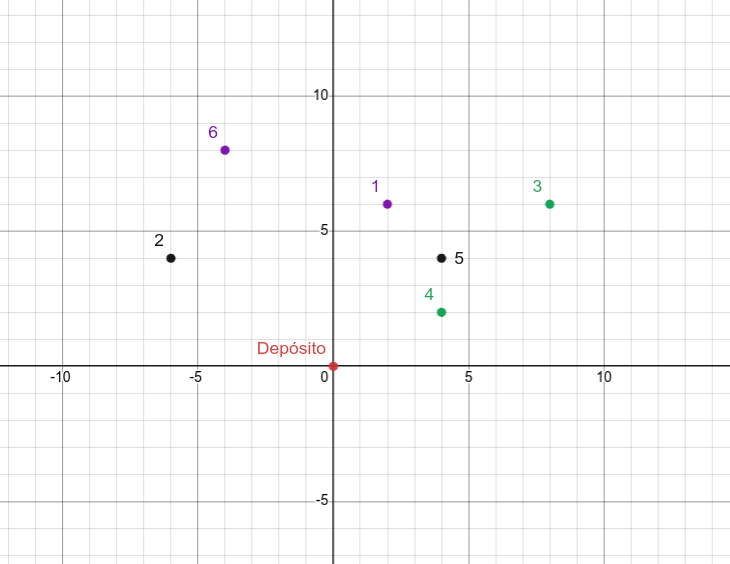

<img src="vprppd_locations.png" width=500 height=400 />

### Solución mediante Or-Tools



**Creando los datos**

Las distancias entre ubicaciones son números reales. Sin embargo, Or-Tools trabaja con pesos enteros en las aristas del grafo del modelo. Por esto, en la función de distancia a continuación se redondean las distancias hasta 2 lugares después de la coma y se escalan por un factor de 100.

Precalcular la matriz de distancias entre ubicaciones es útil porque es más eficiente que calcular las distancias varias veces en tiempo de ejecución por el *solver*.


In [2]:
import math

def create_data():
    data = {}
    locations = [(0,0), (2,6), (-6,4), (8,6), (4,2), (4,4), (-4,8)]
    def distance(i, j):
        x1,y1 = locations[i]
        x2,y2 = locations[j]
        d = math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
        d = (round(d, 2))
        return int(d * 100)
    data['distance_matrix'] = [[distance(i, j) for i in range(len(locations))] for j in range(len(locations))]
    data['num_vehicles'] = 2
    data['depot'] = 0
    data['pickups_deliveries'] = [
        [1,6],
        [2,5],
        [3,4]
    ]
    return data

create_data()

{'distance_matrix': [[0, 632, 721, 1000, 447, 566, 894],
  [632, 0, 825, 600, 447, 283, 632],
  [721, 825, 0, 1414, 1019, 1000, 447],
  [1000, 600, 1414, 0, 566, 447, 1217],
  [447, 447, 1019, 566, 0, 200, 1000],
  [566, 283, 1000, 447, 200, 0, 894],
  [894, 632, 447, 1217, 1000, 894, 0]],
 'num_vehicles': 2,
 'depot': 0,
 'pickups_deliveries': [[1, 6], [2, 5], [3, 4]]}

**Importando las librerías**

In [3]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

**Definiendo el solver y las variables**

Con los datos creados se puede definir un modelo de Or-Tools para ser resuelto.

El *solver* se declara con la línea `routing = pywrapcp.RoutingModel(manager)`

El Manager en Or-Tools se encarga de la administración de los índices de las ubicaciones, variables internas del *solver*. Convierte los índices internos del *solver* a índices en ubicaciones de la matriz de distancias.

Las entradas del método `RoutingIndexManager` son: 
- La cantidad de ubicaciones
- El número de vehículos
- La ubicación del depósito

In [5]:
data = create_data()
number_of_locations = len(data['distance_matrix'])
manager = pywrapcp.RoutingIndexManager(
    number_of_locations,
    data['num_vehicles'],
    data['depot']
)
routing = pywrapcp.RoutingModel(manager)

Hasta aquí se han definido los nodos del grafo, la cantidad de vehículos y el nodo que representa el depósito. Ahora se define el costo de las aristas.

In [6]:
def distance_callback(from_index, to_index):
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['distance_matrix'][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)

El método `RegisterTransitCallback` registra en el *solver* una función que relaciona dos ubicaciones $(i,j)$. Esta relación entre $(i,j)$ puede ser la distancia entre $i$ y $j$, el tiempo de viaje de $i$ a $j$ o cualquier otra medida de interés. En general, registra una función de la forma $(int,int) \rightarrow (int)$. En este caso se registró la función distancia entre nodos.

En la función `distance_callback` se usa el `manager` para convertir los índices internos del *solver* a los índices respectivos que representan las ubicaciones.

Pero solo se ha registrado la función. Para definir el costo de un viaje se puede usar la función registrada `transit_callback_index` en la siguiente línea:

In [7]:
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

Ahora para todos los vehículos el costo de ir de la ubicación $i$ a la ubicación $j$ está dado por la distancia de $i$ a $j$.

Entonces, se tiene un grafo con las ubicaciones y el costo de ir de una ubicación a otra, por lo que se tiene el problema de encontrar las rutas con la mínima distancia total. Sin embargo, la solución óptima para este tipo de problema es asignar un solo vehículo para visitar todas las ubicaciones y encontrar la ruta más corta para ese vehículo. Este es esencialmente el mismo problema que el TSP.  Una mejor manera de definir rutas óptimas es minimizar la longitud de la ruta más larga entre todos los vehículos. Generalmente se utiliza esta vía ya que, en la práctica, muchas veces el objetivo es completar todas las entregas lo antes posible.

Para transformar el problema a uno de minimizar la longitud da la ruta más larga es necesario, para cada ruta tomada por los vehículos, saber cuánta distancia el vehículo recorrió en esa ruta específica. Esto se diferencia del problema de minimizar la distancia total de todas las rutas, en el que no importa la distancia de una ruta específica, sino del conjunto en total.

Para lograr esto Or-Tools posee una característica llamada **dimensiones**. 

El *solver* utiliza un objeto llamado `dimensión` para realizar un seguimiento de las cantidades que se acumulan a lo largo de la ruta de un vehículo, como el tiempo de viaje o, si el vehículo realiza recolecciones y entregas, el peso total que transporta. Si un problema de enrutamiento involucra tal cantidad, ya sea en las restricciones o en la función objetivo, debe definir una dimensión para especificarlas [4].

En este caso nos interesa saber la distancia acumulada de una ruta específica.

**Definiendo las restricciones y función objetivo**

Se modifica la función objetivo para minimizar la longitud de la ruta más larga, añadiendo una dimensión:

In [8]:
dimension_name = 'Distance'
INFINITE = 100000
routing.AddDimension(
    transit_callback_index,
    0,  
    INFINITE, 
    True, 
    dimension_name)

True

El método `AddDimension` recibe:
- Una función `TransitCallback` de la forma $(int,int) \rightarrow (int)$ anteriormente descrita
- *slack*: Una variable que representa el tiempo de espera de un vehículo cuando visita una ubicación, en este caso no se considera por lo que su valor es $0$
- *capacity*: El máximo de la cantidad acumulada en la ruta. Por ejemplo, si se está midiendo distancia sería la máxima distancia posible en una ruta. Si se estuviese contando la carga del vehículo, la carga máxima que puede llevar el vehículo en una ruta. Si es tiempo, el tiempo máximo que puede demorar una ruta, etcétera
- *fix_start_cumulative_to_zero*: Si es `True`, la cantidad acumulada se inicializa en $0$
- El nombre de la dimensión definida

La dimensión definida **Distance** cuenta la distancia recorrida en una ruta. Por ejemplo, si un vehículo toma la ruta $1 \rightarrow 2 \rightarrow 3$, la dimensión **Distance** será: 
$$
transit\_callback\_index(1,2) + transit\_callback\_index(2,3)
$$

Para cada ruta escogida de los vehículos, se calcula la distancia recorrida. Por cada distancia calculada se modifica la función objetivo sumándole tal distancia multiplicada por un coeficiente alto. De esta manera, la función objetivo cambia de forma que se pueda minimizar la mayor distancia entre todas las rutas.

Para dos vehículos, si $d_1$ es la distancia recorrida por el vehículo 1 y $d_2$ es la distancia recorrida por el vehículo 2 en sus respectivas rutas, entonces se modifica la función objetivo:
$$
    F'(x) = F(x) + cd_1 + cd_2 
$$
Donde $c$ es un coeficiente muy alto relativo al problema que se esté tratando.

Esta idea se implementa de la siguiente forma:

In [9]:
distance_dimension = routing.GetDimensionOrDie(dimension_name)
distance_dimension.SetGlobalSpanCostCoefficient(1000)


El método `GetDimensionOrDie` retorna la dimensión buscada o lanza excepción en caso de no encontrarla.

El método `SetGlobalSpanCostCoefficient` implementa la idea mencionada de los coeficientes.

Ahora solo falta definir la restricción:  **En  una ruta, $1$ se visita antes que $6$, $2$ antes que $5$ y $3$ antes que $4$.**

En este caso es díficil usar dimensiones, puesto que esta restricción no tiene forma acumulativa en la ruta. Para ello, Or-Tools tiene el método `AddPickupAndDelivery(i, j)`. Este método notifica al *solver* que las ubicaciones $i$ y $j$ deben estar siempre en la misma ruta. Luego, hay que asegurar que la ubicación $i$ sea visitada antes que la $j$ y además, por el mismo vehículo.

In [10]:
for request in data['pickups_deliveries']:
    pickup_index = manager.NodeToIndex(request[0])
    delivery_index = manager.NodeToIndex(request[1])
    routing.AddPickupAndDelivery(pickup_index, delivery_index)
    routing.solver().Add(
        routing.VehicleVar(pickup_index) == routing.VehicleVar(
                delivery_index))
    routing.solver().Add(
            distance_dimension.CumulVar(pickup_index) <=
            distance_dimension.CumulVar(delivery_index))

```
routing.solver().Add(routing.VehicleVar(pickup_index) == routing.VehicleVar(delivery_index))
```
La ubicación de recogida y entrega para un artículo es hecha por el mismo vehículo.

```
routing.solver().Add(distance_dimension.CumulVar(pickup_index) <= distance_dimension.CumulVar(delivery_index))
```

La ubicación de recogida se visita antes que la ubicación de entrega.

Solo resta llamar al método `SolveWithParameters` del *solver* para resolver el problema. Para ello es necesario:
- Definir los parámetros: Se seleccionan los parámetros por defecto
- Definir una heurística para encontrar una primera solución: Se selecciona una estrategia Greedy que construya la ruta seleccionando la arista con menor costo de forma iterativa

Diferentes métodos heurísticos para encontrar la primera solución pueden influir en el tiempo de ejecución.

In [11]:
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

**Obteniendo la solución**

In [12]:
solution = routing.SolveWithParameters(search_parameters)

**Imprimiendo la solución**

In [13]:
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f'Objective: {solution.ObjectiveValue()}')
    total_distance = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} -> '.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += '{}\n'.format(manager.IndexToNode(index))
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        total_distance += route_distance
    print('Total Distance of all routes: {}m'.format(total_distance))

print_solution(data, manager, routing, solution)

Objective: 3186339
Route for vehicle 0:
 0 ->  2 ->  5 ->  3 ->  4 -> 0
Distance of the route: 3181m

Route for vehicle 1:
 0 ->  1 ->  6 -> 0
Distance of the route: 2158m

Total Distance of all routes: 5339m


### Añadiendo capacidad al problema

Se supone ahora que en las ubicaciones $1,2$ y $3$ se recogen artículos con una capacidad de $c_1$, $c_2$ y $c_3$ respectivamente. Las ubicaciones $6,5$ y $4$ tendrán capacidades $c_6 = - c_1$, $c_5 = - c_2$ y $c_4 = - c_3$. O sea, todo lo recogido en una ubicación se entrega en su ubicación correspondiente. Los vehículos tienen una capacidad máxima $v_1$ y $v_2$.

In [14]:
import math

def create_data():
    data = {}
    locations = [(0,0), (2,6), (-6,4), (8,6), (4,2), (4,4), (-4,8)]
    def distance(i, j):
        x1,y1 = locations[i]
        x2,y2 = locations[j]
        d = math.sqrt((x1- x2) **2 + (y1-y2)**2)
        d = (round(d,2))
        return int(d * 100)
    data["distance_matrix"] = [[distance(i,j) for i in range(len(locations))] for j in range(len(locations))]
    data['num_vehicles'] = 2
    data['depot'] = 0
    data['pickups_deliveries'] = [
        [1,6],
        [2,5],
        [3,4]
    ]
    data['demands'] = [0, 2,5,10,-10,-5,-2] # [c0,c1,c2,c3,c4,c5,c6]
    data['vehicle_capacities'] = [5, 10] # [v1, v2]
    return data

In [15]:


data = create_data()
number_of_locations = len(data['distance_matrix'])
manager = pywrapcp.RoutingIndexManager( number_of_locations,
                                       data['num_vehicles'], data['depot'])
routing = pywrapcp.RoutingModel(manager)

def distance_callback(from_index, to_index):
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['distance_matrix'][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

dimension_name = 'Distance'
INFINITE = 100000
routing.AddDimension(
    transit_callback_index,
    0,  
    INFINITE, 
    True, 
    dimension_name)

distance_dimension = routing.GetDimensionOrDie(dimension_name)
distance_dimension.SetGlobalSpanCostCoefficient(1000)

for request in data['pickups_deliveries']:
    pickup_index = manager.NodeToIndex(request[0])
    delivery_index = manager.NodeToIndex(request[1])
    routing.AddPickupAndDelivery(pickup_index, delivery_index)
    routing.solver().Add(
        routing.VehicleVar(pickup_index) == routing.VehicleVar(
                delivery_index))
    routing.solver().Add(
            distance_dimension.CumulVar(pickup_index) <=
            distance_dimension.CumulVar(delivery_index))

En este caso hay que añadir otra dimensión correspondiente a la demanda de cada ubicación. Con esta dimensión se pueden comprobar las restricciones de capacidad sobre los vehículos dada una ruta.

In [16]:
def demand_callback(from_index):
    from_node = manager.IndexToNode(from_index)
    return data['demands'][from_node]

demand_callback_index = routing.RegisterUnaryTransitCallback(
    demand_callback)
routing.AddDimensionWithVehicleCapacity(
    demand_callback_index,
    0,  # null capacity slack
    data['vehicle_capacities'], 
    True,  
    'Capacity')

True

El método `AddDimensionWithVehicleCapacity` es análogo al método `AddDimension`. La única diferencia es que puede recibir un array de capacidades para definir la capacidad máxima para cada vehículo por separado.

In [17]:
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

In [18]:
solution = routing.SolveWithParameters(search_parameters)

In [19]:
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f'Objective: {solution.ObjectiveValue()}')
    total_distance = 0
    total_load = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        route_load = 0
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route_load += data['demands'][node_index]
            plan_output += ' {0} Load({1}) -> '.format(node_index, route_load)
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += ' {0} Load({1})\n'.format(manager.IndexToNode(index),
                                                 route_load)
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        plan_output += 'Load of the route: {}\n'.format(route_load)
        print(plan_output)
        total_distance += route_distance
        total_load += route_load
    print('Total distance of all routes: {}m'.format(total_distance))
    print('Total load of all routes: {}'.format(total_load))

print_solution(data, manager, routing, solution)

Objective: 3186339
Route for vehicle 0:
 0 Load(0) ->  1 Load(2) ->  6 Load(0) ->  0 Load(0)
Distance of the route: 2158m
Load of the route: 0

Route for vehicle 1:
 0 Load(0) ->  2 Load(5) ->  5 Load(0) ->  3 Load(10) ->  4 Load(0) ->  0 Load(0)
Distance of the route: 3181m
Load of the route: 0

Total distance of all routes: 5339m
Total load of all routes: 0


Note como el vehículo 1 solo puede ir ahora por la ruta $0 \rightarrow 1 \rightarrow 6 \rightarrow 0$, a diferencia del caso anterior.

## Referencias

[1] Argüelles Terrón G.(2020). Validación Automática de Modelos para Problemas de Enrutamiento de Vehículos. Trabajo de Diploma
presentado en opción al título de Licenciado en Ciencia de la Computación. 1-7. 

[2] https://developers.google.com/optimization/routing

[3] https://developers.google.com/optimization/introduction/get_started

[4] https://developers.google.com/optimization/routing/dimensions

[5] https://developers.google.com/optimization/routing/cvrp